In [1]:
import pandas
import seaborn as sns
#Params
population_size=50
#Summarizes collected data, combining all indivs' from 1 generation.
def summarize_across_generations(dataframe):
    compressed_frame = dataframe.copy()
    compressed_frame.drop(compressed_frame.index, inplace=True)
    
    previous_generation = 0
    
    #Adding the first row
    compressed_frame.loc[previous_generation]=[0 for n in range(len(dataframe.columns))]
    population_counter = 0
    for indiv_count in range(len(dataframe)):
        #if indiv_count%population_size == 0:
        current_generation = dataframe["Generation"][indiv_count]
        if current_generation!=previous_generation:
            #Summarizing the previous row.
            compressed_frame.loc[previous_generation]/=population_counter
            #Adding a new row for the next generation.
            compressed_frame.loc[current_generation]=[0 for n in range(len(dataframe.columns))]
            previous_generation=current_generation
            population_counter = 0
        for column in dataframe:
            individual = dataframe[column][indiv_count]
            compressed_frame.iloc[-1, compressed_frame.columns.get_loc(column)]+=individual
        population_counter+=1
    
    compressed_frame.loc[previous_generation]/=population_counter
    return compressed_frame
        

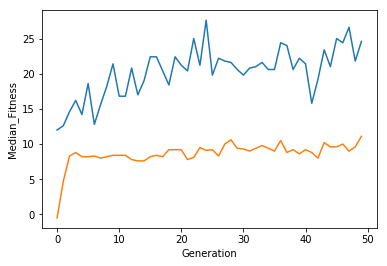

In [2]:
#Plotting Fitness: Converges VERY quickly.
results_folder = "../oct8-evolving-agent-with-charge-output/"
fitness_file = results_folder+"fitness_summary.csv"
fitness_frame = pandas.read_csv(fitness_file, sep=" ")
sns.lineplot(x="Generation", y="Best_Fitness", data=fitness_frame)
sns.lineplot(x="Generation", y="Median_Fitness", data=fitness_frame)
#sns.lineplot(x="Generation", y="StdDev", data=fitness_frame)

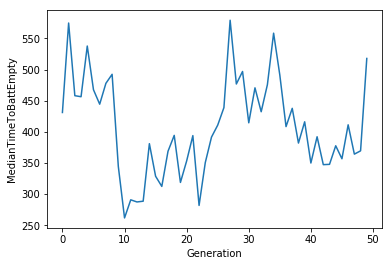

In [4]:

sns.lineplot(x="Generation", y="MedianTimeToBattEmpty", data=fitness_frame)

2497
     Battery    Poison      Food
0  -0.086041 -0.096596 -0.107528
1   0.177898 -0.472278  0.527037
2  -0.050691 -0.638301  0.947609
3   0.090885 -0.732154  0.843774
4   0.166271 -0.458763  0.883399
5   0.018273 -0.626371  0.841767
6   0.064587 -0.641889  0.922415
7   0.149997 -0.768705  0.875131
8   0.083720 -0.796836  0.901337
9  -0.090909 -0.900377  0.924387
10 -0.228517 -0.670337  0.880620
11 -0.145378 -0.769713  0.931123
12 -0.170822 -0.652489  0.728083
13 -0.115360 -0.610361  0.749590
14 -0.007466 -0.461484  0.843196
15 -0.112435 -0.559694  0.820469
16 -0.061471 -0.655308  0.814353
17  0.089036 -0.607993  0.771342
18  0.122892 -0.669555  0.886890
19 -0.009831 -0.685730  0.806228
20 -0.037400 -0.627413  0.865854
21  0.125866 -0.462792  0.861448
22 -0.021179 -0.271293  0.704393
23 -0.039445 -0.260000  0.757794
24  0.039944 -0.298105  0.799254
25  0.102795 -0.370816  0.909738
26  0.121451 -0.515377  0.901583
27  0.305076 -0.599980  0.911267
28  0.121472 -0.505860  0.988998
29  0

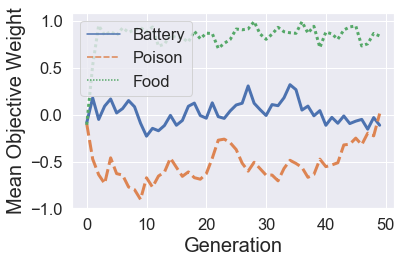

In [5]:
nn_output_file = results_folder+"/nn_outputs_summary.csv"

import matplotlib.pyplot as plt
sns.set(font_scale=1.5)

#Plotting NN outputs (that is, objective values) over generations.
nn_out_frame = pandas.read_csv(nn_output_file, sep=" ")#, header=0, names=["Ammo", "Health", "Frags"])
#nn_out_frame.rename(columns={"Ammo": "Ammunition",
#                              "Health": "Health",
#                              "Frags": "Attack"}, inplace=True)
#print(nn_out_frame)
print(len(nn_out_frame))
summmary_nn_outputs=summarize_across_generations(nn_out_frame)
#summmary_nn_outputs.drop(summmary_nn_outputs.tail(1).index,inplace=True) # drop last n rows
#print(summmary_nn_outputs)
summmary_nn_outputs=summmary_nn_outputs.drop("Generation",1) #Dropping since is same as index
print(summmary_nn_outputs)
plt.xlabel("Generation", fontsize=20)
plt.ylabel("Mean Objective Weight", fontsize=20)
ax=sns.lineplot(data=summmary_nn_outputs, linewidth = 3)
fig=ax.get_figure()
fig.tight_layout()
fig.savefig("objectives_over_generations.pdf")


## Comparing fitnesses

In [15]:
#Made with ComparePerformance.py
evolved_results = pandas.read_csv(results_folder+"evolved_result_summary.csv")
hardcoded_results = pandas.read_csv(results_folder+"hardcoded_result_summary.csv")
evolved_results["fitness"] = evolved_results["food"]-evolved_results["poison"]
hardcoded_results["fitness"] = hardcoded_results["food"]-hardcoded_results["poison"]
print(evolved_results)

    battery  battery_picks  food  \
0         0              3    31   
1         0              0     8   
2       100              6    30   
3       100              6    30   
4       100              6    26   
5        97              6    22   
6       100              6    35   
7         0              4    28   
8        36              5    36   
9         0              4    23   
10       98              6    20   
11      100              6    26   
12        0              2    17   
13      100              6    29   
14      100              6    25   
15      100              6    25   
16      100              6    20   
17      100              6    32   
18      100              6    32   
19      100              6    23   
20        0              0     7   
21       51              5    29   
22        0              3    19   
23        0              4    25   
24      100              7    35   

                                         goal_history  num_time

In [16]:
#Combining dataframes for plotting
evo_string = ["evo" for i in range(len(evolved_results))]
evolved_results["Goal_Type"] = evo_string
hardcoded_string = ["hardcoded" for i in range(len(hardcoded_results))]
hardcoded_results["Goal_Type"] = hardcoded_string

combined_frame = pandas.concat([evolved_results,hardcoded_results])
print(combined_frame)


    battery  battery_picks  food  \
0         0              3    31   
1         0              0     8   
2       100              6    30   
3       100              6    30   
4       100              6    26   
5        97              6    22   
6       100              6    35   
7         0              4    28   
8        36              5    36   
9         0              4    23   
10       98              6    20   
11      100              6    26   
12        0              2    17   
13      100              6    29   
14      100              6    25   
15      100              6    25   
16      100              6    20   
17      100              6    32   
18      100              6    32   
19      100              6    23   
20        0              0     7   
21       51              5    29   
22        0              3    19   
23        0              4    25   
24      100              7    35   
0       100              9     1   
1         0              4  

MannwhitneyuResult(statistic=59.0, pvalue=4.41900809128096e-07)

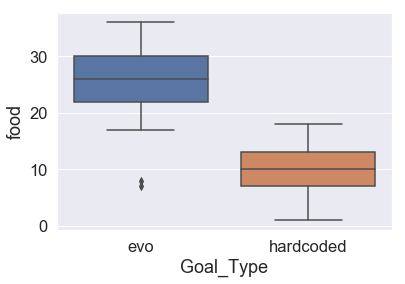

In [17]:
from scipy.stats import mannwhitneyu

import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
sns.boxplot(x='Goal_Type', y='food', data=combined_frame)
mannwhitneyu(evolved_results["fitness"], hardcoded_results["fitness"])


#fig=plot.get_figure()
#plt.ylabel("Fitness", fontsize=20)
#fig.tight_layout()
#fig.savefig('fitness_evo_vs_hardcoded', dpi=300)

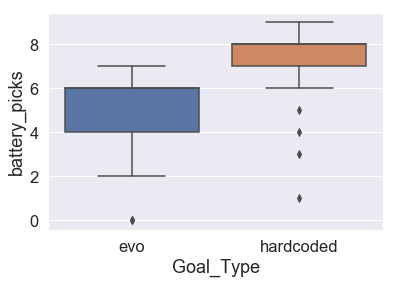

In [18]:
sns.boxplot(x='Goal_Type', y='battery_picks', data=combined_frame)

MannwhitneyuResult(statistic=272.5, pvalue=0.16017512911827597)

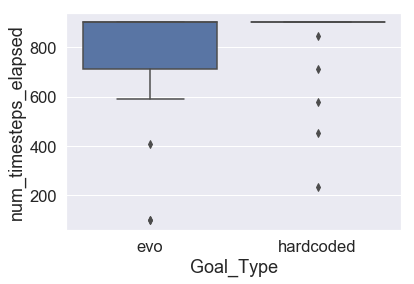

In [19]:
import matplotlib.pyplot as plt
sns.set(font_scale=1.5)
sns.boxplot(x='Goal_Type', y='num_timesteps_elapsed', data=combined_frame)

mannwhitneyu(evolved_results["num_timesteps_elapsed"], hardcoded_results["num_timesteps_elapsed"])

## Analyzing behavior

In [20]:
import numpy as np
behavior_file = results_folder+"nn_behavior_measures_to_objectives.csv"
behavior_frame = pandas.read_csv(behavior_file, sep=" ")
behavior_frame.shape
#behavior_frame.rename(columns={"m_ammo": "Current Ammunition",
#                              "m_health": "Current Health",
#                              "m_frags": "Monsters Killed",
#                              "o_ammo":"Ammunition",
#                              "o_health":"Health",
#                              "o_frags":"Attack"}, inplace=True)
print(behavior_frame)

      m_battery  m_poisons     m_food  o_battery  o_poisons  o_foods  \
0           0.0   0.000000   0.000000        1.0        0.0      1.0   
1           0.0   1.578947   0.000000        1.0        0.0      1.0   
2           0.0   3.157895   0.000000        1.0        0.0      1.0   
3           0.0   4.736842   0.000000        1.0        0.0      1.0   
4           0.0   6.315789   0.000000        1.0        0.0      1.0   
5           0.0   7.894737   0.000000        1.0        0.0      1.0   
6           0.0   9.473684   0.000000        1.0        0.0      1.0   
7           0.0  11.052632   0.000000        1.0        0.0      1.0   
8           0.0  12.631579   0.000000        1.0        0.0      1.0   
9           0.0  14.210526   0.000000        1.0        0.0      1.0   
10          0.0  15.789474   0.000000        1.0        0.0      1.0   
11          0.0  17.368421   0.000000        1.0        0.0      1.0   
12          0.0  18.947368   0.000000        1.0        0.0     

In [21]:
#Method for summarizing and plotting averages for 1 measurement.
def summarize_measurement_and_plot_objectives(dataframe, main_objective):
    meas_to_objectives_array = []
    unique_main_measures = dataframe[main_objective].unique()
    for unique_measure in unique_main_measures:
        #All frames with given value for the column
        sub_frame=dataframe.loc[dataframe[main_objective] == unique_measure]
        objective_means = [sub_frame["o_battery"].mean(), sub_frame["o_poisons"].mean(),sub_frame["o_foods"].mean()]
        meas_to_objectives_array.append([unique_measure,*objective_means])

    meas_to_objectives_array=np.array(meas_to_objectives_array)
    df = pandas.DataFrame(meas_to_objectives_array, columns=[main_objective, 'o_battery', 'o_poisons', 'o_foods'])
    ax=df.plot(x=main_objective, y=['o_battery', 'o_poisons', 'o_foods'], linewidth=5)
    fig=ax.get_figure()
    plt.ylabel("Objective Weight", fontsize=20)
    fig.tight_layout()
    fig.savefig(main_objective.replace(" ","")+".pdf")


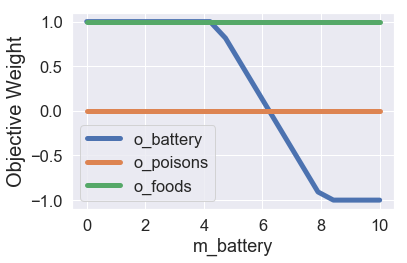

In [22]:
#Battery is normalized. Normally, it ranges from 0 to 10, representing 0 to 100%. If battery is larger, e.g. size 30, range will change accordingly
summarize_measurement_and_plot_objectives(behavior_frame, 'm_battery')

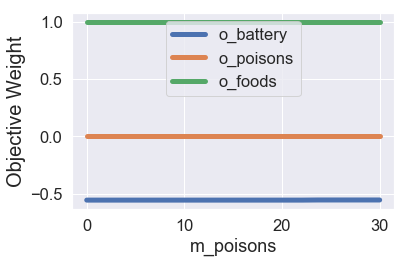

In [9]:
summarize_measurement_and_plot_objectives(behavior_frame, 'm_poisons')

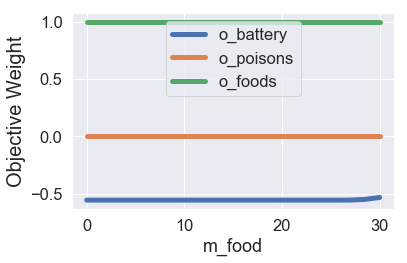

In [10]:
summarize_measurement_and_plot_objectives(behavior_frame, 'm_food')


In [34]:
#Learns to seek battery as long as having eaten few foods. Probably a "hack" to seek batteries early,
#Then stop that later when it has enough battery anyway.
#KOE: Runime was fast! 2 hours total, but converged after 30 min, probably.

## Analyzing Objective History

In [7]:
history_file = results_folder+"measurements_and_objectives_dataframe.csv"
history_frame = pandas.read_csv(history_file, sep=" ")
history_frame.shape
history_frame['timestep'] = range(1, len(history_frame) + 1)
print(history_frame)
#Index column

     m_batt m_pois m_food                 o_batt o_pois o_food  Unnamed: 6  \
0       9.9    0.0    0.0                   -1.0    0.0    1.0         NaN   
1       9.8    0.0    0.0                   -1.0    0.0    1.0         NaN   
2       9.7    0.0    0.0                   -1.0    0.0    1.0         NaN   
3       9.6    0.0    0.0                   -1.0    0.0    1.0         NaN   
4       9.5    0.0    0.0                   -1.0    0.0    1.0         NaN   
5       9.4    0.0    0.0                   -1.0    0.0    1.0         NaN   
6       9.3    0.0    0.0                   -1.0    0.0    1.0         NaN   
7       9.2    0.0    0.0                   -1.0    0.0    1.0         NaN   
8       9.1    0.0    0.0                   -1.0    0.0    1.0         NaN   
9       9.0    0.0    0.0                   -1.0    0.0    1.0         NaN   
10      8.9    0.0    1.0                   -1.0    0.0    1.0         NaN   
11      8.8    0.0    1.0                   -1.0    0.0    1.0  

In [8]:
#history_frame=history_frame.astype(float)
#history_frame.timestep = pandas.to_numeric(history_frame.timestep)
#print(history_frame['m_batt'][499])
#history_frame.m_batt = pandas.to_numeric(history_frame.m_batt)
#history_frame.o_batt = pandas.to_numeric(history_frame.o_batt)
ax=history_frame.plot(x='timestep', y=['m_batt', 'o_batt'], linewidth=5)

TypeError: Empty 'DataFrame': no numeric data to plot